In [10]:
import pandas as pd
import numpy as np
import seaborn as sns



# Q1) Import and store the data in a data frame.
Answer:

In [11]:
df=pd.read_csv("http://users.stat.ufl.edu/~winner/data/airq402.dat", names=['City1', 'City2', 'Average_Fare', 'Distance', 'Average_weekly_passengers', 'market_leading_airline', 'market_share', 'Average_fare', 'Low_price_airline', 'market_share', 'price'], delim_whitespace=True)
df.head(5)

C:\Users\neeha\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


City1 City2  Average_Fare  Distance  Average_weekly_passengers  \
0   CAK   ATL        114.47       528                     424.56   
1   CAK   MCO        122.47       860                     276.84   
2   ALB   ATL        214.42       852                     215.76   
3   ALB   BWI         69.40       288                     606.84   
4   ALB   ORD        158.13       723                     313.04   

  market_leading_airline  market_share  Average_fare Low_price_airline  \
0                     FL         70.19        111.03                FL   
1                     FL         75.10        123.09                DL   
2                     DL         78.89        223.98                CO   
3                     WN         96.97         68.86                WN   
4                     UA         39.79        161.36                WN   

   market_share.1   price  
0           70.19  111.03  
1           17.23  118.94  
2            2.77  167.12  
3           96.97   68.86  
4           15.34  145.42

# Q2) Remove the outliers from the data (5 points)
Answer

In [50]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Average_Fare                  71.4175
Distance                     899.0000
Average_weekly_passengers    512.7150
market_share                  27.0000
Average_fare                  78.8925
market_share.1                39.7775
price                         54.7625
dtype: float64


In [51]:
df_new=df[["Average_Fare","Distance","Average_weekly_passengers","market_share","Average_fare","market_share.1", "price"]]
df_new.shape

(1000, 7)

In [52]:
df_new.head()

Average_Fare  Distance  Average_weekly_passengers  market_share  \
0        114.47       528                     424.56         70.19   
1        122.47       860                     276.84         75.10   
2        214.42       852                     215.76         78.89   
3         69.40       288                     606.84         96.97   
4        158.13       723                     313.04         39.79   

   Average_fare  market_share.1   price  
0        111.03           70.19  111.03  
1        123.09           17.23  118.94  
2        223.98            2.77  167.12  
3         68.86           96.97   68.86  
4        161.36           15.34  145.42

In [53]:
df_out = df_new[~((df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(885, 7)

# Q3) Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable and split the table. (3 points)

Answer

Used the dataframe which has removed outliers df_out for splitting the data

In [54]:
df_dependent=df_out['Average_Fare']
df_independent=df_out[["Distance","Average_weekly_passengers","market_share","Average_fare","market_share.1", "price"]]

In [55]:
print("Dependent Variable\n ", df_dependent)
print("Independent Variable\n ", df_independent)

Dependent Variable
  0      114.47
1      122.47
2      214.42
3       69.40
4      158.13
5      135.17
6      152.85
7      190.73
8      129.35
9      134.17
10     212.49
11     173.56
12     170.67
13     120.24
14     168.69
15     154.40
16     114.24
17     132.29
18     181.99
19     233.05
20     162.21
21     161.74
22      71.57
23     163.63
24     134.42
25     165.69
26      77.82
27     227.93
28      74.82
29     120.50
        ...  
962    215.62
963    156.14
964     75.34
965    194.58
966    120.89
967    142.71
968    143.99
969    102.95
970    110.64
971     98.36
973    165.13
974    177.77
975    215.04
976    122.02
978    148.62
979    177.91
980     74.62
982    134.18
984    237.26
987    105.84
988    144.22
990    156.01
991     70.61
992    162.46
993    131.47
995    136.16
996     83.28
997    159.97
998     73.57
999    126.67
Name: Average_Fare, Length: 885, dtype: float64
Independent Variable
       Distance  Average_weekly_passengers  market_share

# Q4) Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
Answer

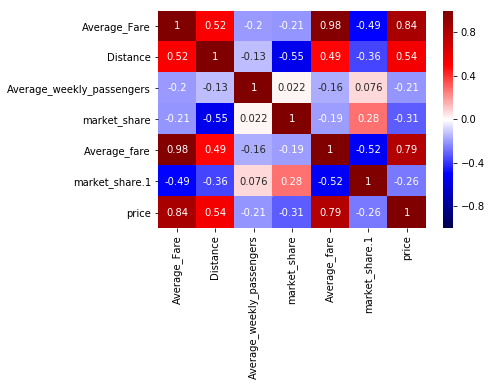

In [56]:
import seaborn as sns
sns.heatmap(df_out.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

Removed all independent variables which have <0.1 correlation with Average_Fare the dependent variable

In [57]:
import statsmodels.formula.api as sm
m_linear_mod = sm.ols(formula ="Average_Fare ~ Distance+\
                      Average_fare + price", data = df_out).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Average_Fare   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     9828.
Date:                Sun, 06 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:38:16   Log-Likelihood:                -3123.4
No. Observations:                 885   AIC:                             6255.
Df Residuals:                     881   BIC:                             6274.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.6149      1.029      6.429      0.000       4.596       8.634
Distance         0.0019      0.001      3.572      0.000       0.001       0.003
Average_fare     0.7643      0.009     88.353      0.000       0.747       0.781
price            0.1951      0.012     16.283      0.000       0.172       0.219
==============================================================================
Omnibus:                      141.066   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.164
Skew:                           0.627   Prob(JB):                    3.36e-153
Kurtosis:                       7.179   Cond. No.                     4.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Q5) Create scatter Plot of Independent Variable vs Dependent Variable. 
Answer

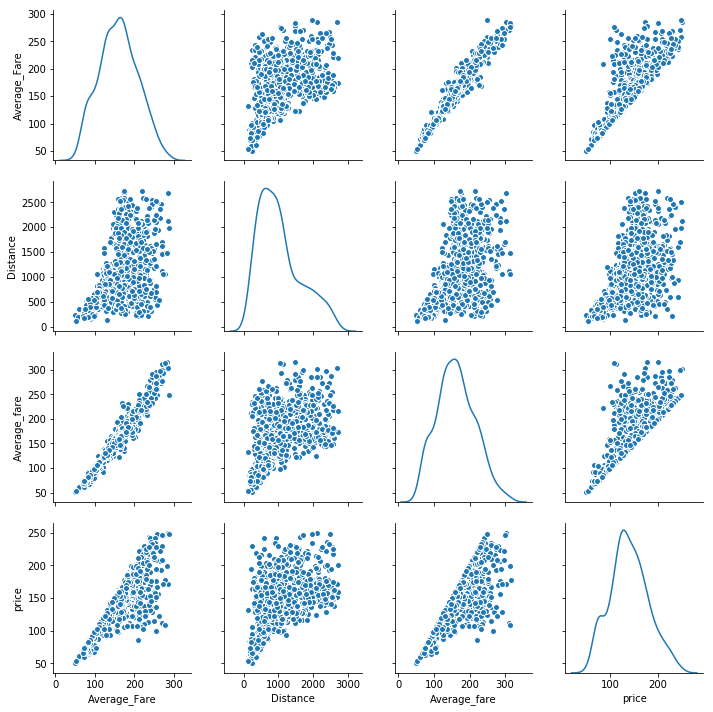

In [58]:
sns.pairplot(df_out[['Average_Fare','Distance','Average_fare' , 'price' ]], diag_kind = 'kde')

# Q6) Divide the data set into training and test data set and build a Multiple Linear Regression model.

Answer:

Used the dataframe which has already removed outliers to split the data into test and train

In [65]:
df_reg=df_out[["Average_Fare","Distance","Average_fare", "price"]]
df_reg.shape

X = df_reg.iloc[:, 1:].values
y = df_reg.iloc[:, 0].values

print(y)
X


[114.47 122.47 214.42  69.4  158.13 135.17 152.85 190.73 129.35 134.17
 212.49 173.56 170.67 120.24 168.69 154.4  114.24 132.29 181.99 233.05
 162.21 161.74  71.57 163.63 134.42 165.69  77.82 227.93  74.82 120.5
 205.24 132.52 117.85 233.63 234.2  184.9  195.72 112.28 194.55 133.8
 118.93 132.   131.4   96.78  94.95 211.09 136.03 208.6   94.79 110.6
 221.95 259.76 243.22 103.47 129.21 103.19 138.67 209.89 116.41  98.62
 130.89 227.23 198.07 199.73 210.45 137.9   92.18 236.93 102.75 252.66
 203.29  98.23 195.29 115.95 236.1  192.67 231.06 206.36 250.88 285.76
  82.76 265.27  95.19 128.75 137.63 110.61 128.2  127.37 123.98 122.38
 186.26 176.77  90.7  150.14 117.9   87.71 138.96 178.55  92.35 132.7
 134.21 163.37 133.04 177.41 153.38 170.03 223.26 177.23 245.59 122.89
  99.16  68.57 237.    83.51  80.62 216.89 191.68 198.83 129.48 139.06
  74.41 188.43 124.   121.07 126.27 156.54  72.03 196.95  86.77  74.08
 144.45 242.02 103.89 142.22  71.81 173.01 161.38 177.45 123.67 165.32
 180.99  7

array([[528.  , 111.03, 111.03],
       [860.  , 123.09, 118.94],
       [852.  , 223.98, 167.12],
       ...,
       [814.  , 159.65, 159.02],
       [174.  ,  73.44,  73.44],
       [859.  , 129.92, 121.94]])

In [66]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [67]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
y_pred=regressor.predict(X_test)
y_pred

array([ 92.58054402, 146.24600844, 205.20566494, 177.38528151,
       135.61281252, 166.68375333, 112.46298228, 205.00607321,
        78.03162352, 161.48367719, 148.28296695, 186.26374749,
       225.09882854, 126.78155629, 130.57082943,  85.45795727,
       129.52237017, 218.3663873 , 179.18606488, 125.60387135,
        96.2340703 , 227.70542203, 179.06755508, 149.40443527,
       248.55368347, 191.44336045, 200.72989769, 174.17345142,
       155.50529633, 167.20410851, 208.45621632,  84.9219163 ,
       236.48326935, 197.40199656, 139.62207007, 137.20499749,
       101.42213707, 275.91016638, 148.10415591, 223.66141579,
       206.83913797, 237.915689  , 132.11129275,  76.89126508,
       195.95256753, 148.44816147, 166.67015568, 166.97569875,
        84.99386883, 122.91983123,  78.62995589, 211.12923168,
       131.90992072, 217.89504949, 187.5803196 , 250.20841704,
       254.09851229,  79.41505581,  71.37395332, 189.07337918,
       139.90963895, 171.71457698, 213.93355813, 137.02

# Q7 ) Print the coefficients & intercepts of the linear regression model (5 points)
Answer:

In [63]:
regressor.coef_

array([0.00162991, 0.75495234, 0.20619658])

In [64]:
regressor.intercept_

6.839410199722181